In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Columnas de = Electricidad, Continentes, Nuevos Nombres de Columnas

In [133]:
col_electricity = ['low_carbon_electricity',
            'nuclear_electricity',
            'oil_electricity',
            'other_renewable_electricity',
            'other_renewable_exc_biofuel_electricity',
            'solar_electricity',
            'wind_electricity',
            'fossil_electricity',
            'gas_electricity',
            'hydro_electricity',
            'biofuel_electricity',
            'coal_electricity']
col_cons =['biofuel_consumption',
           'coal_consumption',
           'fossil_fuel_consumption',
           'gas_consumption',
           'hydro_consumption',
           'low_carbon_consumption',
           'nuclear_consumption',
           'oil_consumption',
           'solar_consumption']

continent_map = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
               'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
               'Chad', 'Comoros', 'Congo', 'Cote d\'Ivoire', 'Democratic Republic of the Congo',
               'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
               'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
               'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
               'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
               'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
               'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia',
               'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
             'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India',
             'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
             'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia','Maldives', 'Mongolia', 'Myanmar', 'Nepal',
             'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
             'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
             'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
             'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europa': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
               'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
               'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
               'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
               'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
               'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
               'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'Norte America': ['Canada', 'Greenland', 'Mexico', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'New Zealand', 'Papua New Guinea'],
    'Sud America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
                      'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

rename_columns = {
    'nuclear_electricity': 'nuclear',
    'oil_electricity': 'petroleo',
    'solar_electricity': 'solar',
    'wind_electricity': 'eolica',
    'fossil_electricity': 'fosil',
    'gas_electricity': 'gas',
    'hydro_electricity': 'hidro',
    'biofuel_electricity': 'bio fuel',
    }


In [134]:
data = pd.read_csv ("World Energy Consumption.csv", index_col='year')
data.index = pd.to_datetime(data.index,format='%Y')

## Generacion Data Set desde DataFrame base

In [135]:
continente = 'Europa'
data['continente'] = data['country'].map(lambda x: next((k for k, v in continent_map.items() if x in v), None))
df_continente = data[data['continente'] == continente]
df_continente = df_continente.groupby(['year', 'continente'])[col_electricity].sum().reset_index('continente')
df_continente = df_continente[df_continente.index.year > 1970]
df_continente['carbon'] = df_continente['low_carbon_electricity'] + df_continente['coal_electricity']
df_continente['renovable']  = df_continente['other_renewable_electricity'] + df_continente['other_renewable_exc_biofuel_electricity']
df_continente.head(3)

,continente,low_carbon_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,fossil_electricity,gas_electricity,hydro_electricity,biofuel_electricity,coal_electricity,carbon,renovable
year,,,,,,,,,,,,,,,
1971-01-01,Europa,287.811,50.867,0.0,7.070,0.0,0.0,0.0,0.0,0.0,329.222,0.0,0.0,287.811,7.070
1972-01-01,Europa,314.967,67.513,0.0,6.948,0.0,0.0,0.0,0.0,0.0,340.299,0.0,0.0,314.967,6.948
1973-01-01,Europa,326.350,74.378,0.0,7.466,0.0,0.0,0.0,0.0,0.0,347.924,0.0,0.0,326.350,7.466


## Depuracion y Data Set Final

In [136]:
df_continente.drop(columns=['low_carbon_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity','coal_electricity'],inplace=True)
df_continente.rename(columns=rename_columns,inplace=True)
df_continente.head(3)

,continente,nuclear,petroleo,solar,eolica,fosil,gas,hidro,bio fuel,carbon,renovable
year,,,,,,,,,,,
1971-01-01,Europa,50.867,0.0,0.0,0.0,0.0,0.0,329.222,0.0,287.811,7.070
1972-01-01,Europa,67.513,0.0,0.0,0.0,0.0,0.0,340.299,0.0,314.967,6.948
1973-01-01,Europa,74.378,0.0,0.0,0.0,0.0,0.0,347.924,0.0,326.350,7.466


### Grafico historico por continente y distribucion porcentual. Explicado por etapa

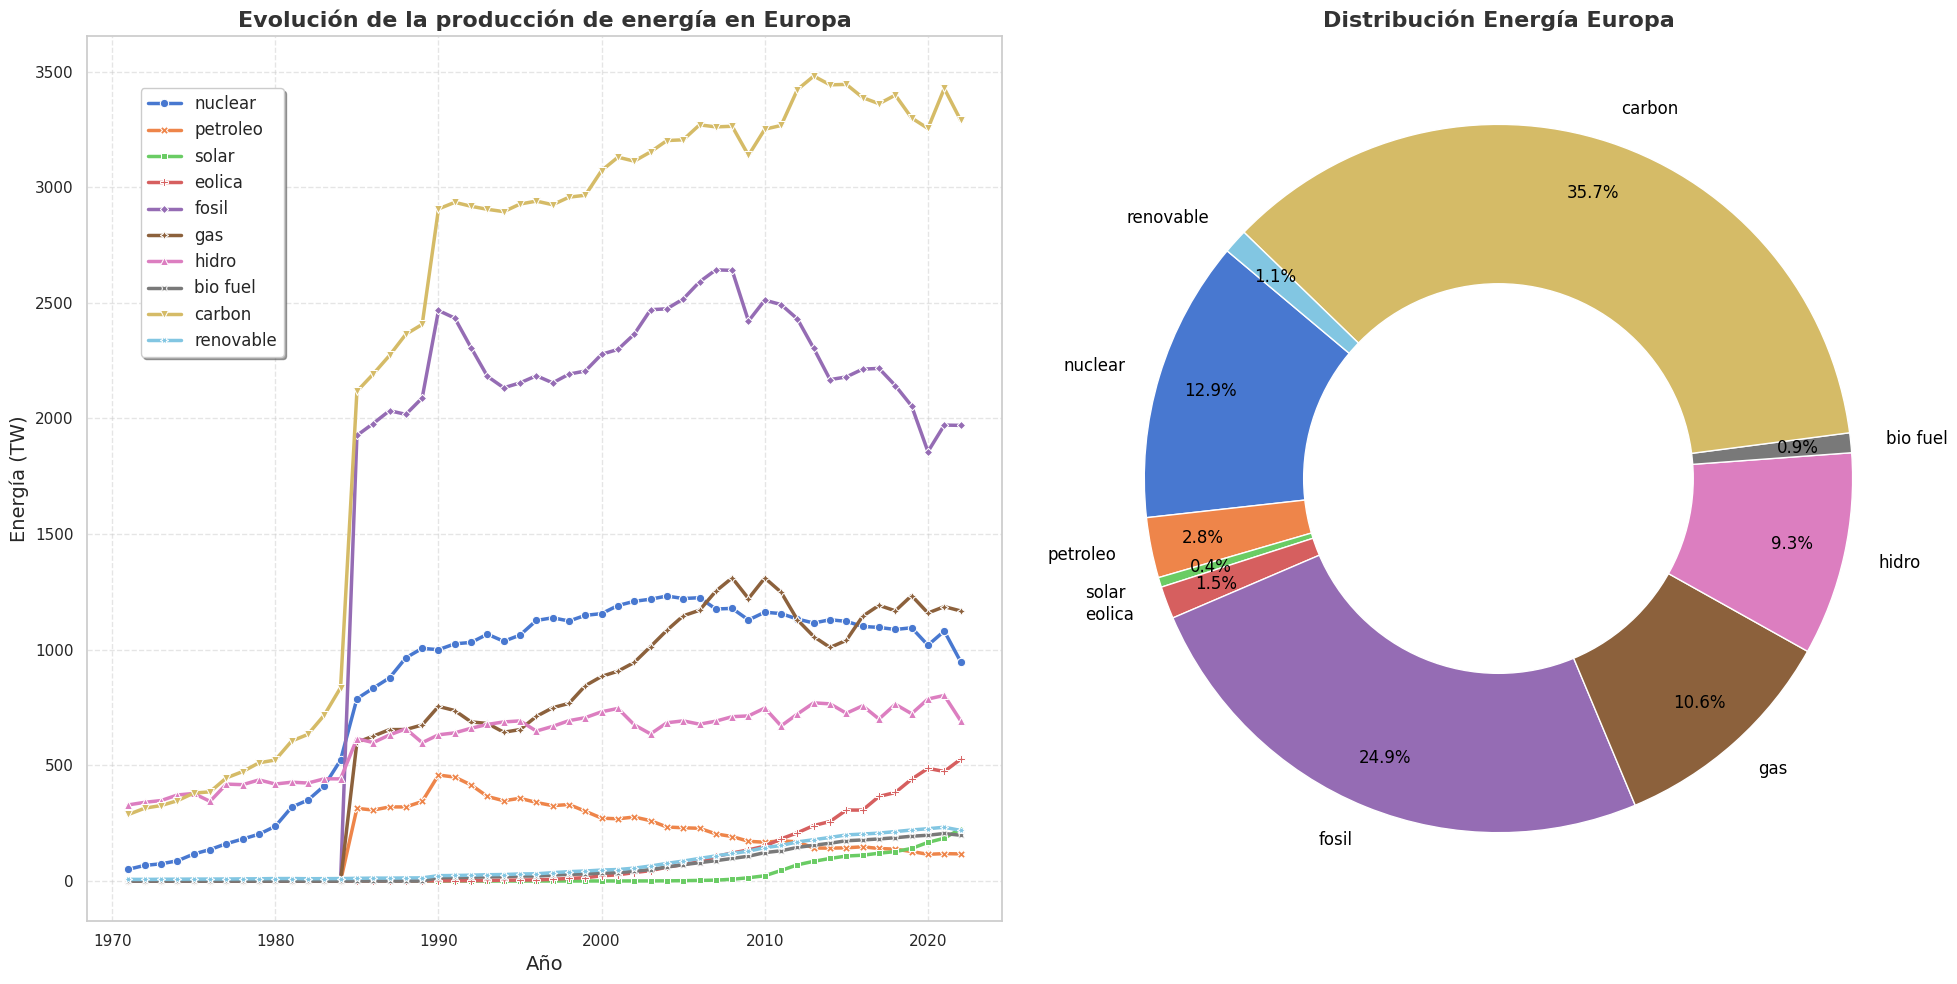

In [141]:
sns.set_theme(style="whitegrid")

colors = sns.color_palette('muted', 10)  # 10 colores para 10 categorías de energía
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
energy_sources = ['nuclear', 'petroleo', 'solar', 'eolica', 'fosil', 'gas', 'hidro', 'bio fuel', 'carbon', 'renovable']

sns.lineplot(
    data=df_continente[energy_sources],
    palette=colors,  # misma paleta de colores que el gráfico de pastel
    linestyle='-',
    markers=True,
    dashes=False,
    ax=ax[0],
    linewidth=2.5
)

ax[0].set_title(f'Evolución de la producción de energía en {continente}', fontsize=16, weight='bold', color='#333333')
ax[0].set_xlabel('Año', fontsize=14)
ax[0].set_ylabel('Energía (TW)', fontsize=14)
ax[0].legend(energy_sources, loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12, frameon=True, shadow=True)
ax[0].grid(True, linestyle='--', alpha=0.5)


totals = df_continente[energy_sources].sum()
porcentajes = (totals / totals.sum()) * 100

patches, texts, autotexts = ax[1].pie(
    porcentajes,
    labels=totals.index,
    colors=colors,  #  misma paleta de colores
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    textprops={'color':"black", 'fontsize':12},
    pctdistance=0.85,
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)

centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax[1].add_artist(centre_circle)

ax[1].set_title(f'Distribución Energía {continente}', fontsize=16, weight='bold', color='#333333')

plt.tight_layout()
plt.show()


### version ms simple y menos "pesada"

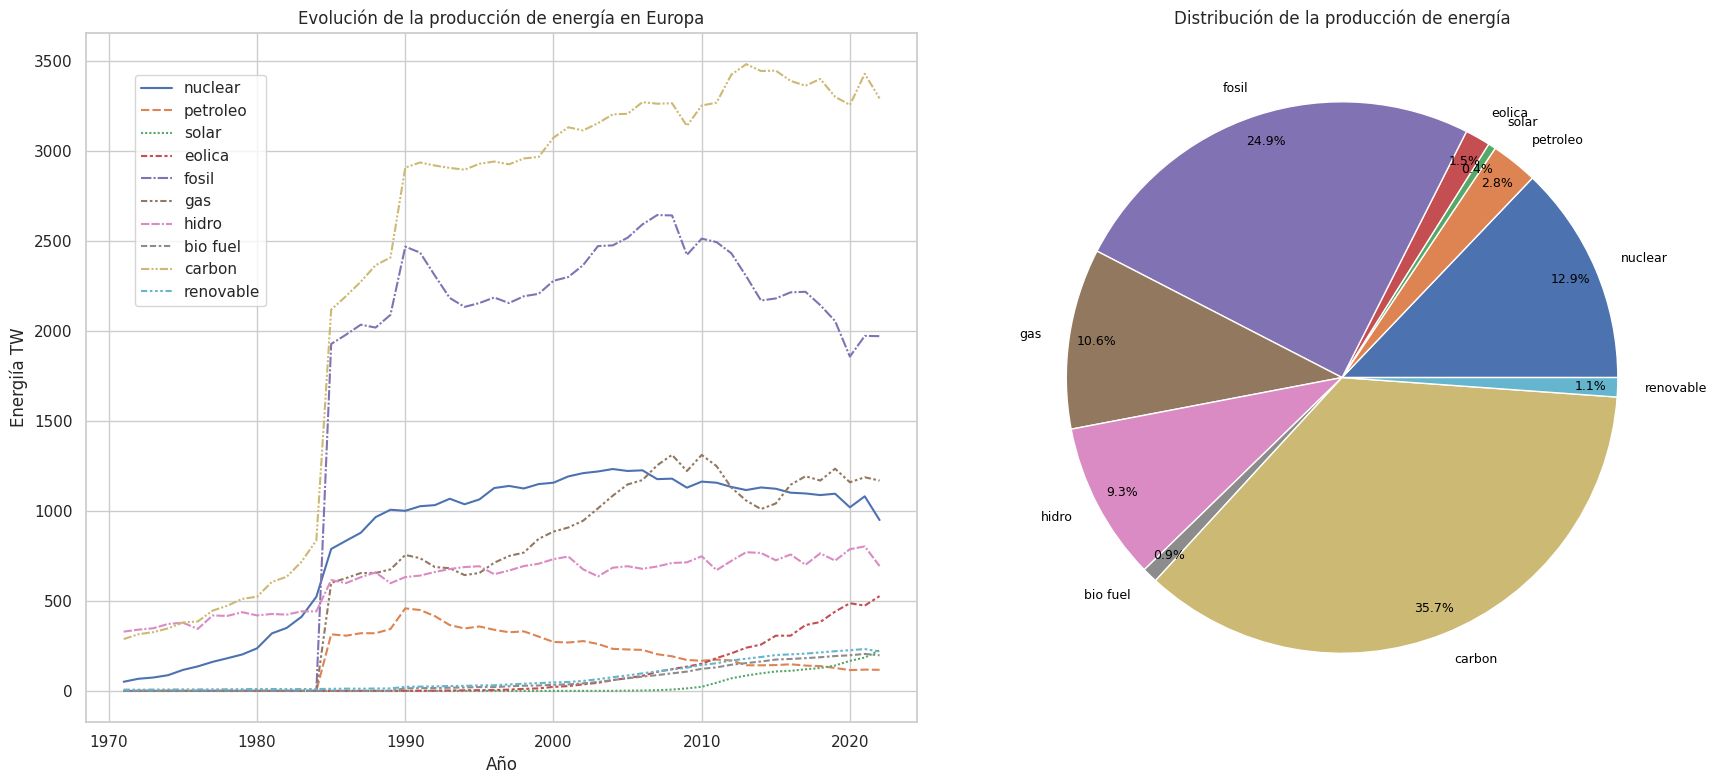

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot(data=df_continente[['nuclear', 'petroleo', 'solar', 'eolica', 'fosil', 'gas', 'hidro', 'bio fuel', 'carbon', 'renovable']], palette='deep',linestyle='-',ax=ax[0])

# Personalizar el gráfico
ax[0].set_title(f'Evolución de la producción de energía en {continente}')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Energiía TW')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
ax[0].grid(True)


totals = df_continente[['nuclear', 'petroleo', 'solar', 'eolica', 'fosil', 'gas', 'hidro', 'bio fuel', 'carbon', 'renovable']].sum()

# Calcular el porcentaje de cada columna con respecto al total
porcentajes = (totals / totals.sum()) * 100

# Crear el gráfico circular

ax[1].pie(porcentajes, labels=totals.index, autopct=lambda p : '{:.1f}%'.format(p) if p > 0 else '', textprops={'color':'black', 'fontsize':9}, pctdistance=0.9)
ax[1].set_title('Distribución de la producción de energía')

plt.tight_layout()
plt.show()